# Training a logistic Regression model
In this notebook, I will train a logistic regression model and do grid search to tune the parameters. 

In [27]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix

Reading the scraped text from the pickle file

In [28]:
df = pd.read_pickle("./pkl_files/dmoz_subset_51788_sites_scraped_cleaned_w_lang.pkl")

In [29]:
df.head()

,website_url,MCat,cleaned_website_text,lang
0,http://www.ign.com/movies/role-models/theater-...,Arts,ign role models photo video feature message bo...,en
1,http://www.all-reviews.com/videos/blairwitchpr...,Arts,blair witch project review film movie video re...,en
2,http://www.ucalgary.ca/UofC/eduweb/engl403/wif...,Arts,wife lament old english text word hot link glo...,en
3,http://www.codetrip.net/,Arts,franklin martin official site ambient percussi...,en
4,http://www.picklehead.com/ian/ian_irving.html,Arts,irving berlin hollywood ian whitcomb liner not...,en


In [30]:
#only take the english language entries
df = df[df["lang"] == "en"]
df.shape

(49747, 4)

In [31]:
df.head()

,website_url,MCat,cleaned_website_text,lang
0,http://www.ign.com/movies/role-models/theater-...,Arts,ign role models photo video feature message bo...,en
1,http://www.all-reviews.com/videos/blairwitchpr...,Arts,blair witch project review film movie video re...,en
2,http://www.ucalgary.ca/UofC/eduweb/engl403/wif...,Arts,wife lament old english text word hot link glo...,en
3,http://www.codetrip.net/,Arts,franklin martin official site ambient percussi...,en
4,http://www.picklehead.com/ian/ian_irving.html,Arts,irving berlin hollywood ian whitcomb liner not...,en


In [32]:
df["word_count"] = df.apply(lambda row: len(row["cleaned_website_text"].split(" ")),axis=1)

In [164]:
#lets take the first 300 words from all the rows
df["text_500_words"] = df.apply(lambda row: " ".join(row["cleaned_website_text"].split(" ")[:500]),axis=1)

In [ ]:
5

In [165]:
df["word_count"] = df.apply(lambda row: len(row["text_500_words"].split(" ")),axis=1)
df["word_count"].describe()

count    49747.000000
mean       313.932398
std        178.282063
min          4.000000
25%        149.000000
50%        340.000000
75%        500.000000
max        500.000000
Name: word_count, dtype: float64

In [166]:
df["text_500_words"].apply(lambda x: len(x.split(" "))).sum()

15617195

In [167]:
categories = df["MCat"].unique()
categories

array(['Arts', 'News', 'Reference', 'Society', 'Games', 'Business',
       'Shopping', 'Science', 'Computers', 'Health', 'Home'], dtype=object)

We have over 19 million words in the dataset

In [168]:
X = df.text_500_words
y = df.MCat
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)
X_train.shape,X_test.shape, y_train.shape, y_test.shape

((34822,), (14925,), (34822,), (14925,))

# Using Logistic regression

In [169]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [173]:
tfidf_vectorizer=TfidfVectorizer(use_idf=True,min_df = 5, max_df=0.99,dtype='float32')
tfidf_vectorizer.fit_transform(df["text_500_words"])

C:\Users\rachh\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:1817: UserWarning: Only (<class 'numpy.float64'>, <class 'numpy.float32'>, <class 'numpy.float16'>) 'dtype' should be used. float32 'dtype' will be converted to np.float64.
  UserWarning)


<49747x59239 sparse matrix of type '<class 'numpy.float32'>'
	with 7974647 stored elements in Compressed Sparse Row format>

In [174]:
tfidf_vectorizer

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype='float32', encoding='utf-8', input='content',
                lowercase=True, max_df=0.99, max_features=None, min_df=5,
                ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

In [175]:
import pickle
# saving the model
pickle.dump(tfidf_vectorizer,open("test.pk",'wb'))

In [176]:
X_train = tfidf_vectorizer.transform(X_train)
X_test = tfidf_vectorizer.transform(X_test)

In [177]:
logreg = LogisticRegression(verbose=1, 
                            random_state=0,
                            C=3.5,
                            solver = 'liblinear',
                           n_jobs = 4)
logreg

LogisticRegression(C=3.5, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=4, penalty='l2', random_state=0,
                   solver='liblinear', tol=0.0001, verbose=1, warm_start=False)

In [178]:
logreg.fit(X_train, y_train)

C:\Users\rachh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1539: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[LibLinear]

LogisticRegression(C=3.5, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=4, penalty='l2', random_state=0,
                   solver='liblinear', tol=0.0001, verbose=1, warm_start=False)

In [179]:
y_pred = logreg.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred,target_names=categories))

accuracy 0.7786934673366834
              precision    recall  f1-score   support

        Arts       0.73      0.79      0.76      1426
        News       0.69      0.69      0.69      1329
   Reference       0.75      0.83      0.79      1345
     Society       0.90      0.90      0.90      1411
       Games       0.85      0.86      0.86      1403
    Business       0.84      0.79      0.81      1182
    Shopping       0.84      0.83      0.83      1513
     Science       0.76      0.72      0.74      1361
   Computers       0.70      0.69      0.70      1288
      Health       0.71      0.75      0.73      1351
        Home       0.80      0.70      0.75      1316

    accuracy                           0.78     14925
   macro avg       0.78      0.78      0.78     14925
weighted avg       0.78      0.78      0.78     14925



In [180]:
import pickle
pickle.dump(logreg,open("logistic_regression_78_acc_3.sav",'wb'))

Accuracy of upto 77.37% was achieved. Let's to grid search to tune the paramters a bit more.

## Using Grid search to find the best parameter

In [181]:
# Grid searching
from sklearn.model_selection import GridSearchCV
parameters = {"C":[1,1.5,2.5,3,3.5,4,4.5,5,5.5,6], "solver":["liblinear"]}
grid_search = GridSearchCV(logreg,parameters,cv=4,return_train_score=True)
grid_search.fit(X_train,y_train)
grid_search.best_params_

C:\Users\rachh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1539: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]

{'C': 3.5, 'solver': 'liblinear'}

The best parameters seem to be C = 5 and solver = liblinear.

In [182]:
logreg = LogisticRegression(verbose=1, 
                            random_state=0,
                            C=3.5,
                            solver = 'liblinear',
                           n_jobs = 4)
logreg

LogisticRegression(C=3.5, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=4, penalty='l2', random_state=0,
                   solver='liblinear', tol=0.0001, verbose=1, warm_start=False)

In [183]:
logreg.fit(X_train, y_train)

[LibLinear]

LogisticRegression(C=3.5, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=4, penalty='l2', random_state=0,
                   solver='liblinear', tol=0.0001, verbose=1, warm_start=False)

In [184]:
y_pred = logreg.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred,target_names=categories))

accuracy 0.7786934673366834
              precision    recall  f1-score   support

        Arts       0.73      0.79      0.76      1426
        News       0.69      0.69      0.69      1329
   Reference       0.75      0.83      0.79      1345
     Society       0.90      0.90      0.90      1411
       Games       0.85      0.86      0.86      1403
    Business       0.84      0.79      0.81      1182
    Shopping       0.84      0.83      0.83      1513
     Science       0.76      0.72      0.74      1361
   Computers       0.70      0.69      0.70      1288
      Health       0.71      0.75      0.73      1351
        Home       0.80      0.70      0.75      1316

    accuracy                           0.78     14925
   macro avg       0.78      0.78      0.78     14925
weighted avg       0.78      0.78      0.78     14925



The accuracy improved upto 77.90 percent

In [163]:
import pickle
# saving the model
pickle.dump(logreg,open("logistic_regression_78_acc_2.sav",'wb'))

In [21]:
log_reg_model.predict_proba(vectorized_text)*100

array([[ 0.51178732,  2.78504209,  0.13046777,  0.23238935, 76.59199108,
         0.37208455,  3.66235743,  0.43697575,  0.77815319, 10.46796221,
         4.03078924]])

## Building a confusion matrix and visualizing it

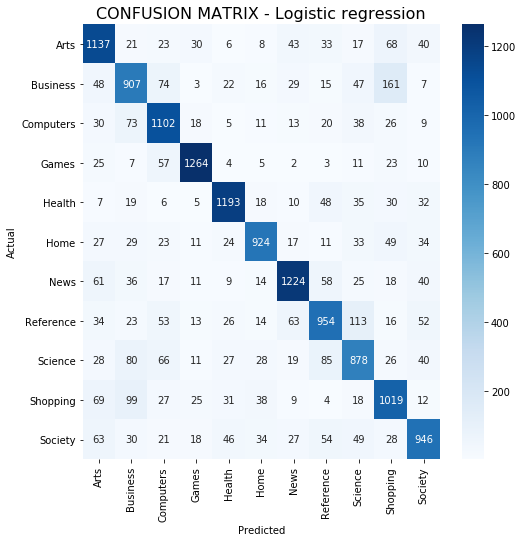

In [106]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
cf_matrix = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(cf_matrix, annot=True, cmap="Blues", fmt='d',
            xticklabels=log_reg_model.classes_, 
            yticklabels=log_reg_model.classes_)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title("CONFUSION MATRIX - Logistic regression", size=16);

It Seem the high number of incorrect predictions are as follows:
- Business websites being predicted as Shopping(161)
- Reference websites being predicted as Science(113)
- Shopping websites being predicted as Business (99)
- Science websites being predicted as Business(80)